Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None

First few rows of training data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0

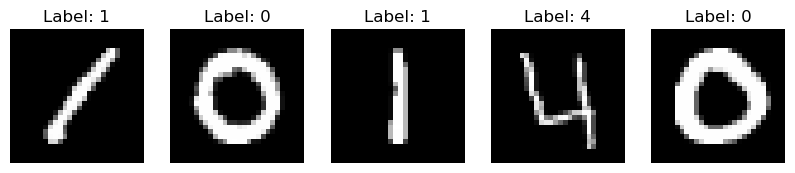

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display basic info
print("Training Data Info:")
print(train_df.info())

print("\nTesting Data Info:")
print(test_df.info())

# Check the first few rows of the dataset
print("\nFirst few rows of training data:")
print(train_df.head())

# Check the shape of the datasets
print(f"\nTraining Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")

# Separate labels and features (assuming the first column is the label)
X_train = train_df.iloc[:, 1:].values  # Pixel values
y_train = train_df.iloc[:, 0].values   # Labels

# Check unique labels to confirm all digits (0-9) are present
print("\nUnique labels in training data:", np.unique(y_train))

# Visualizing some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 pixels
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()


In [2]:
pip install protobuf==3.20.*

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/8d/14/619e24a4c70df2901e1f4dbc50a6291eb63a759172558df326347dce1f0d/protobuf-3.20.3-py2.py3-none-any.whl.metadata (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x000001A748BCBD70>: Failed to establish a new connection: [WinError 10051] A socket operation was attempted to an unreachable network'))



In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize pixel values (scale from 0-255 to 0-1)
X_train = X_train / 255.0

# Reshape images for CNN (28x28 pixels, 1 channel for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the final datasets
print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, Labels Shape: {y_val.shape}")

Training Data Shape: (33600, 28, 28, 1), Labels Shape: (33600, 10)
Validation Data Shape: (8400, 28, 28, 1), Labels Shape: (8400, 10)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flattening Layer
    Flatten(),

    # Fully Connected Layer
    Dense(units=128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting

    # Output Layer (10 classes for digits 0-9)
    Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

C:\Users\Shik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define hyperparameters
batch_size = 64  # Number of samples per training batch
epochs = 20  # Number of full passes through the dataset

# Early Stopping (stop training if validation loss doesn't improve for 3 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce Learning Rate (reduce LR by 0.5 if validation loss doesn't improve for 2 epochs)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7814 - loss: 0.6767 - val_accuracy: 0.9750 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9628 - loss: 0.1230 - val_accuracy: 0.9838 - val_loss: 0.0550 - learning_rate: 0.0010
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9767 - loss: 0.0805 - val_accuracy: 0.9848 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9798 - loss: 0.0638 - val_accuracy: 0.9863 - val_loss: 0.0422 - learning_rate: 0.0010
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9832 - loss: 0.0569 - val_accuracy: 0.9877 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.9895 - val_loss: 0.0363 - learning_rate: 0.0010
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9866 - loss: 0.0402 - 

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.0311

Validation Accuracy: 0.9925
Validation Loss: 0.0277


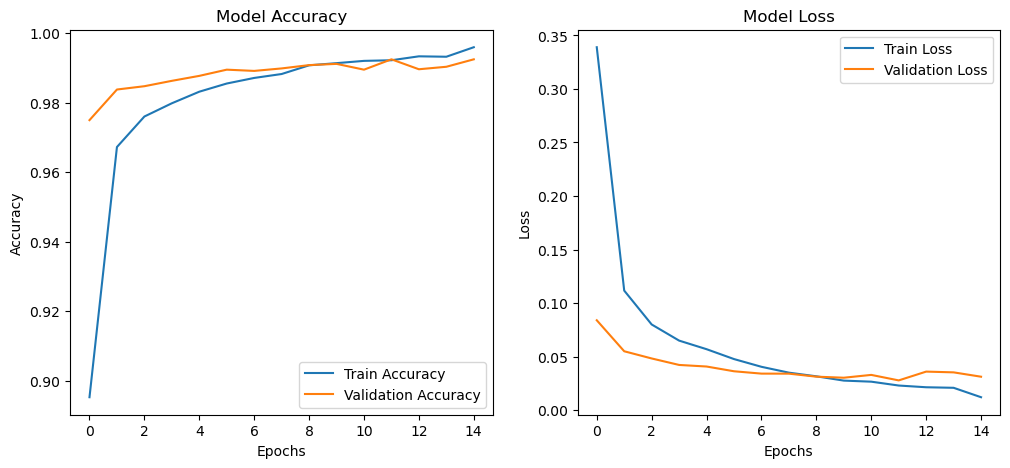

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


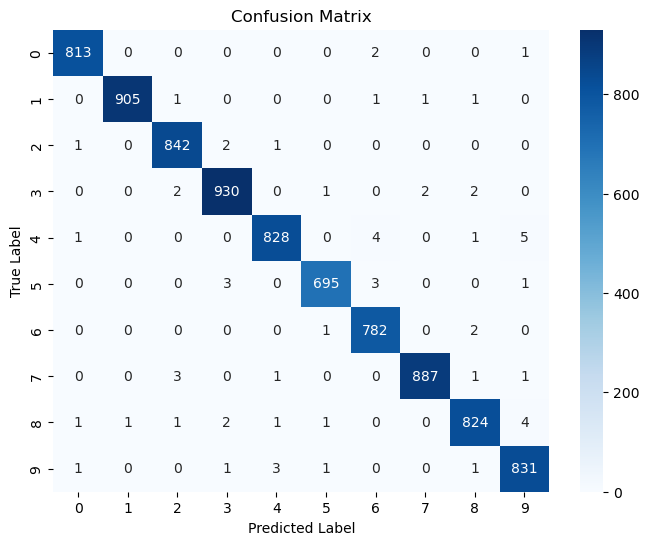

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Plot training history (Accuracy & Loss)
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Accuracy
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Plot Loss
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Call the function to plot
plot_training_history(history)

# Generate predictions for validation set
y_pred = model.predict(X_val)

# Convert one-hot encoded labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


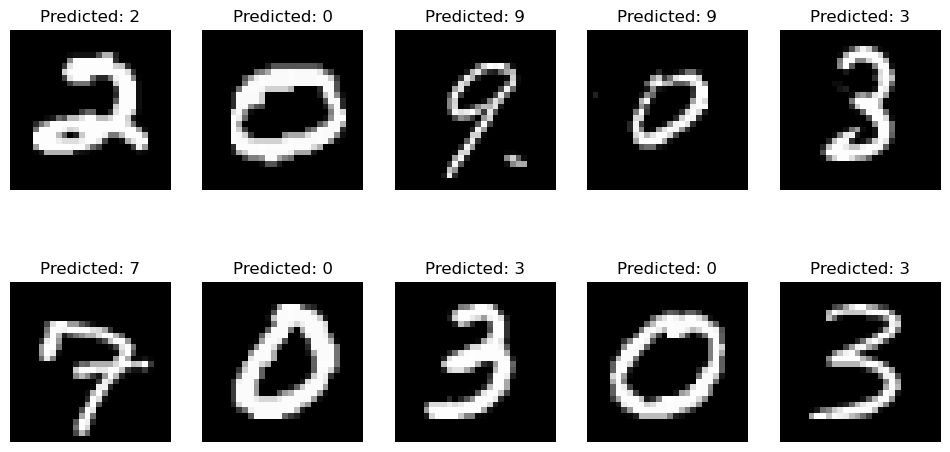

In [7]:
# Load the test dataset
test_df = pd.read_csv("test.csv")

# Convert test data to NumPy array
X_test = test_df.values

# Normalize the test data (scale pixel values from 0-255 to 0-1)
X_test = X_test / 255.0

# Reshape test images for CNN input
X_test = X_test.reshape(-1, 28, 28, 1)

# Make predictions on the test dataset
y_test_pred = model.predict(X_test)

# Convert predicted probabilities to class labels (0-9)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Display some sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {y_test_pred_classes[i]}")
    axes[i].axis('off')

plt.show()

In [8]:
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

# Print Python version
print(f"Python Version: {sys.version}")

# Print library versions
print(f"TensorFlow Version: {tf.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Scikit-Learn Version: {sklearn.__version__}")

Python Version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
TensorFlow Version: 2.18.0
NumPy Version: 1.26.4
Pandas Version: 2.2.2
Matplotlib Version: 3.9.2
Seaborn Version: 0.13.2
Scikit-Learn Version: 1.5.1
